In [32]:
import pandas as pd
import numpy as np

reading a data set(football related) and storing it as players using pandas

In [55]:
players = pd.read_csv("players_22.csv")

<ipython-input-55-08b1a8bf1ee9>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


these are the features we are interested in organizing, you can choose any other features from the data set

In [56]:
features = ["overall", "potential" , "wage_eur", "value_eur" , "age" ]

we are removing any column/row from the data set which has a null value since k means clustering doesn't work on null values

In [35]:
players = players.dropna(subset= features)

we are copying the feature columns of our data set (players) and storing it in 'data'

In [36]:
data = players[features].copy()

here's how it looks


In [37]:
data


,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


we are scaling the value; first step to k means clustering and ranging it from 1-10 (note that the minimum should be greater than 0)

In [38]:
data = ((data-data.min())/(data.max()- data.min()))*9 +1

we are creating a method which randomly initializing centroids; second step to k means clustering. we are taking a random value from each row in data and appending it to a dataframe (pd.concat)

In [39]:
def random_centroids(data, k):
  centroids = []
  for i in range (k):
    centroid = data.apply(lambda x : float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)


In [41]:
centroids = random_centroids(data, 5)

In [42]:
centroids

,0,1,2,3,4
overall,5.304348,4.521739,6.282609,2.956522,2.565217
potential,4.130435,6.086957,4.326087,3.739130,4.717391
wage_eur,1.000000,1.090129,1.009013,1.012876,1.038627
value_eur,1.050616,1.045976,1.124846,1.010253,1.055255
age,5.000000,5.333333,2.333333,4.666667,4.333333


we are creating a method which gives a label to each centroid ; third step to kmc. we are finding the min distance between the rand centroid and actual value in data. idymin returns which cluster(column/feature) the min value is from 

In [59]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda y: np.sqrt(((data - y)**2).sum(axis=1)))
  return distances.idymin(axis=1)

In [44]:
labels = get_labels(data, centroids)

finding the geometric mean and grouping it. .T turns the rows to columns and columns to rows since this returns an inverted array

In [46]:
def new_centroids (data, labels, k):
  return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

In [47]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from IPython.display import clear_output               

this step is not necessary but it's more efficient to implement it. when creating a plot, it is easier to visualize it when we are handling 2d data. in this case its 5d (5 columns) so we are converting the 5d data into 2d for easier plotting

In [48]:
def plot_clusters (data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x = centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()




we are iterating the above process of randomizing, finding the min distance and finding the G.M till we reach a maximum of 100 iterations or till the centroids don't change. the number of iterations might vary everytime since we are initializing randomly

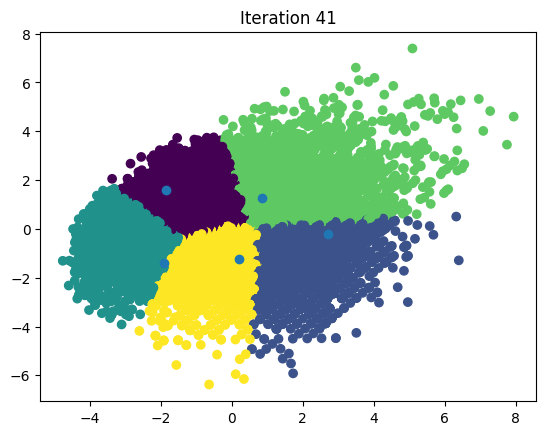

In [54]:

max_iteration = 100
k = 5
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration =1
while iteration < max_iteration and not centroids.equals(old_centroids): 
  old_centroids = centroids
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters (data, labels, centroids, iteration)
  iteration+=1
